In [1]:
# Import Library Pandas
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import yfinance as yfin

yfin.pdr_override()

In [2]:
# Load Dataset BBCA.JK
start = datetime.datetime(2018,1,1)
end = datetime.datetime.now()


df = web.get_data_yahoo("BBCA.JK",start,end)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-19,9900.0,9975.0,9825.0,9875.0,9875.0,53341300
2024-02-20,9850.0,10025.0,9850.0,10025.0,10025.0,63997700
2024-02-21,9950.0,10000.0,9850.0,9975.0,9975.0,75371600
2024-02-22,9975.0,9975.0,9875.0,9875.0,9875.0,66913000
2024-02-23,9900.0,9925.0,9800.0,9825.0,9825.0,55192300
2024-02-26,9750.0,9875.0,9725.0,9800.0,9800.0,41356000
2024-02-27,9750.0,9900.0,9750.0,9875.0,9875.0,43735800
2024-02-28,9975.0,10000.0,9900.0,10000.0,10000.0,54043100
2024-02-29,10000.0,10000.0,9850.0,9875.0,9875.0,126671200


In [3]:
df.shape

(1534, 6)

In [4]:
close_adj = df['Adj Close']
# mavg = moving average saham,
# set mavg = 100, dimana 100 menandakan 100 hari terakhir.
mavg = close_adj.rolling(window=100).mean()
mavg.tail(20)

Date
2024-01-31    9087.976348
2024-02-01    9094.159658
2024-02-02    9100.342969
2024-02-05    9105.525088
2024-02-06    9111.456025
2024-02-07    9117.888145
2024-02-12    9126.315518
2024-02-13    9133.992891
2024-02-15    9142.173828
2024-02-16    9150.608320
2024-02-19    9158.541631
2024-02-20    9168.472568
2024-02-21    9178.649941
2024-02-22    9188.324941
2024-02-23    9198.246377
2024-02-26    9208.415439
2024-02-27    9216.846377
2024-02-28    9225.283242
2024-02-29    9232.470107
2024-03-01    9240.401045
Name: Adj Close, dtype: float64

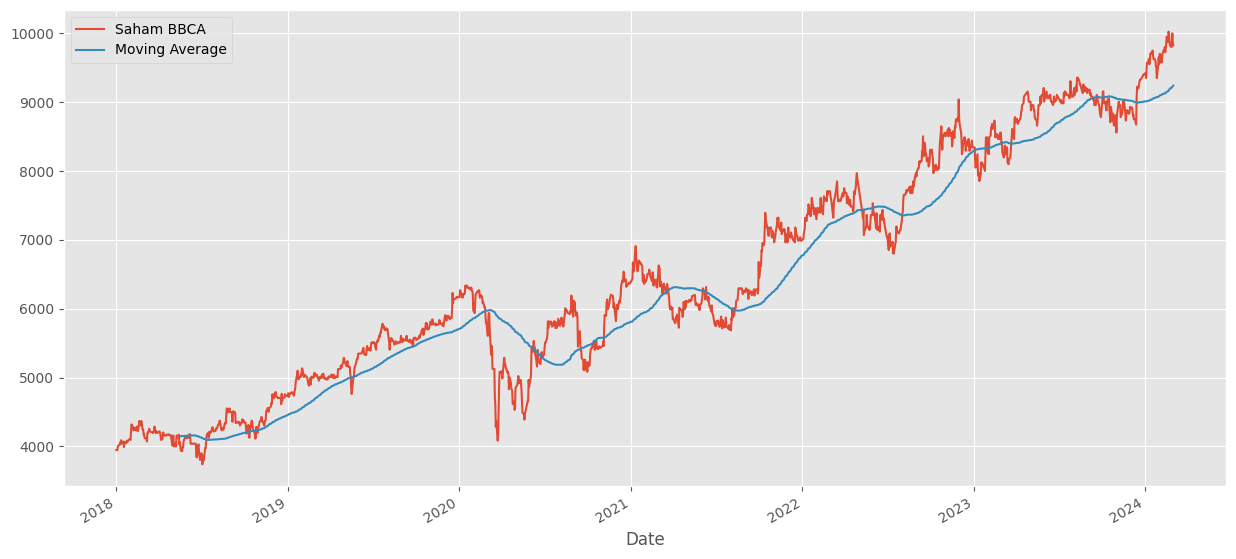

In [5]:
# Plot Harga Saham dengan Moving Average nya:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Size of Matplotlib
import matplotlib as mpl
mpl.rc('figure',figsize = (15,7))
mpl.__version__

style.use('ggplot')

close_adj.plot(label = 'Saham BBCA')
mavg.plot(label = 'Moving Average')
plt.legend()

In [6]:
# Rets untuk menghitung perbedaan harga adj_close dari h-1 sebelum Market Close.
rets = close_adj / close_adj.shift(1) - 1
rets.head(5)
# Function rets berguna untuk prediction. Sangat penting untuk trader,
# karena dapat menghitung berapa persen profit/return yang diperoleh ketika Daily trading

Date
2018-01-01         NaN
2018-01-02    0.000000
2018-01-03    0.000000
2018-01-04    0.014840
2018-01-05    0.001125
Name: Adj Close, dtype: float64

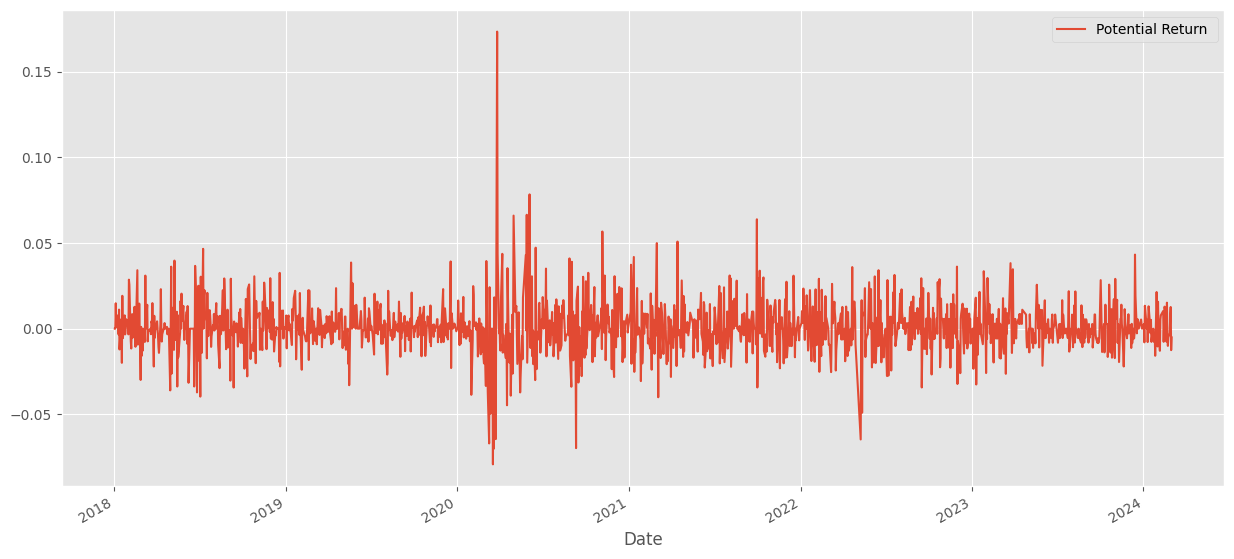

In [7]:
rets.plot(label = 'Potential Return ')
plt.legend()
# Plot potential return/profit dari suatu saham. jika nilainya diatas 0, menandakan profit, jika dibawah 0 menandakan loss/rugi

In [8]:
# Compare Harga Saham-Saham sejenis:
# membandingkan harga Adj Close saham saham Bank yang sejenis dengan BBCA:
dfcompare = web.get_data_yahoo(["BBCA.JK","BBRI.JK","BMRI.JK","BBNI.JK","BNGA.JK"],start = start,end=end)['Adj Close']
dfcompare.rename(columns = {'BBCA.JK':'BBCA','BBRI.JK':'BBRI','BMRI.JK':'BMRI','BBNI.JK':'BBNI','BNGA.JK':'BNGA'},inplace = True)

[*********************100%%**********************]  5 of 5 completed


In [9]:
dfcompare.tail(10)

Ticker,BBCA,BBNI,BBRI,BMRI,BNGA
Date,,,,,
2024-02-19,9875.0,5875.0,6100.0,7150.0,1935.0
2024-02-20,10025.0,6025.0,6300.0,7150.0,1980.0
2024-02-21,9975.0,6000.0,6300.0,7250.0,2080.0
2024-02-22,9875.0,5950.0,6250.0,7100.0,2100.0
2024-02-23,9825.0,5900.0,6125.0,7050.0,2030.0
2024-02-26,9800.0,5900.0,6175.0,7050.0,2050.0
2024-02-27,9875.0,6000.0,6125.0,7075.0,2120.0
2024-02-28,10000.0,5975.0,6225.0,7125.0,2080.0
2024-02-29,9875.0,6000.0,6125.0,7000.0,1995.0


In [10]:
dfcompare.shape

(1534, 5)

In [11]:
dfcompare

Ticker,BBCA,BBNI,BBRI,BMRI,BNGA
Date,,,,,
2018-01-01,3946.549072,4261.303711,2598.755127,3156.422607,954.670105
2018-01-02,3946.549072,4207.499512,2591.615967,3097.239990,933.455200
2018-01-03,3946.549072,4056.846924,2577.336670,3038.057129,908.704651
2018-01-04,4005.115723,4046.085938,2534.500000,3087.376465,951.134338
2018-01-05,4009.621094,4003.042480,2563.058105,3087.376465,968.813416
...,...,...,...,...,...
2024-02-26,9800.000000,5900.000000,6175.000000,7050.000000,2050.000000
2024-02-27,9875.000000,6000.000000,6125.000000,7075.000000,2120.000000
2024-02-28,10000.000000,5975.000000,6225.000000,7125.000000,2080.000000


In [12]:
# Function Correlation untuk mengecek apakah ada correlation harga antara Adj Close dengan harga sekarang
retscompare = round(dfcompare.pct_change(),4)

correlation = retscompare.corr()

correlation

Ticker,BBCA,BBNI,BBRI,BMRI,BNGA
Ticker,,,,,
BBCA,1.000000,0.528858,0.549002,0.555457,0.318137
BBNI,0.528858,1.000000,0.679971,0.699133,0.413947
BBRI,0.549002,0.679971,1.000000,0.674413,0.386756
BMRI,0.555457,0.699133,0.674413,1.000000,0.375242
BNGA,0.318137,0.413947,0.386756,0.375242,1.000000


Text(0, 0.5, 'Returns BBRI')

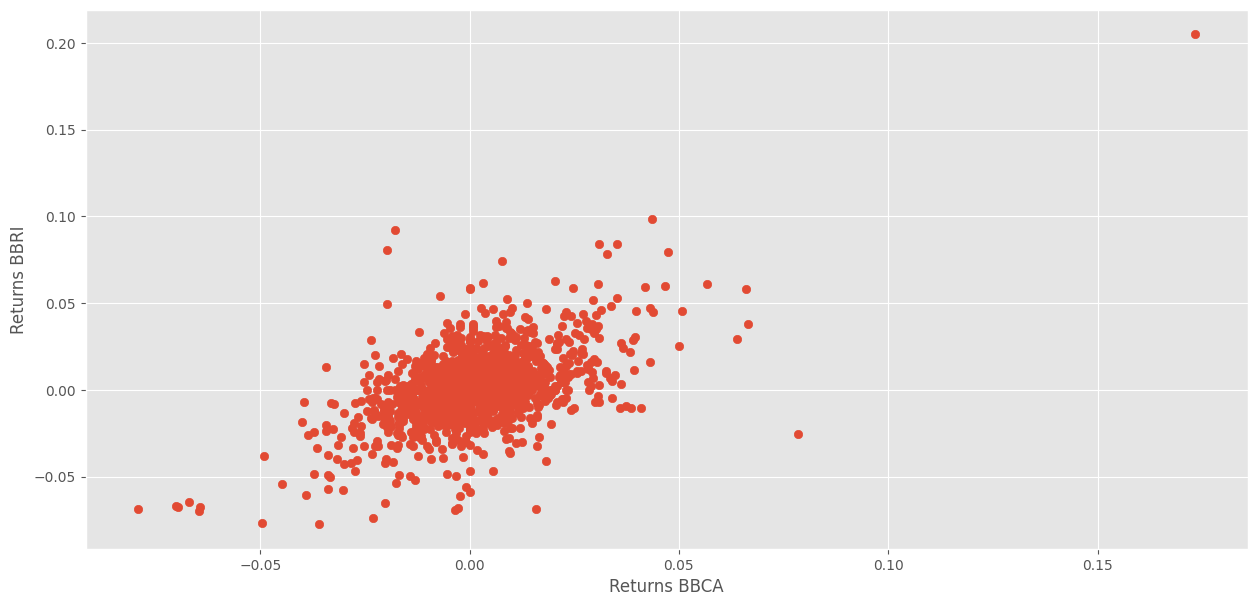

In [15]:
# Cek Return dari Saham BBCA dan BBRI
plt.scatter(retscompare.BBCA, retscompare.BBRI)
plt.xlabel('Returns BBCA')
plt.ylabel('Returns BBRI')

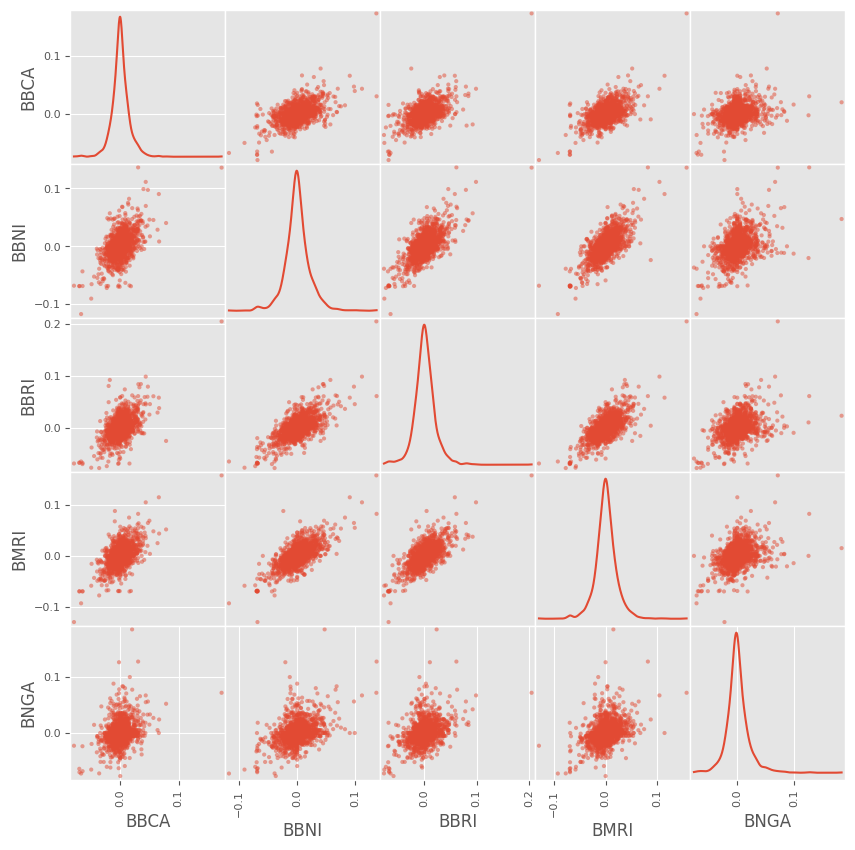

In [25]:
# Plot Semua Saham yang ingin di predict:
from pandas.plotting import scatter_matrix
scatter_matrix(retscompare, diagonal = 'kde',figsize = (10,10));

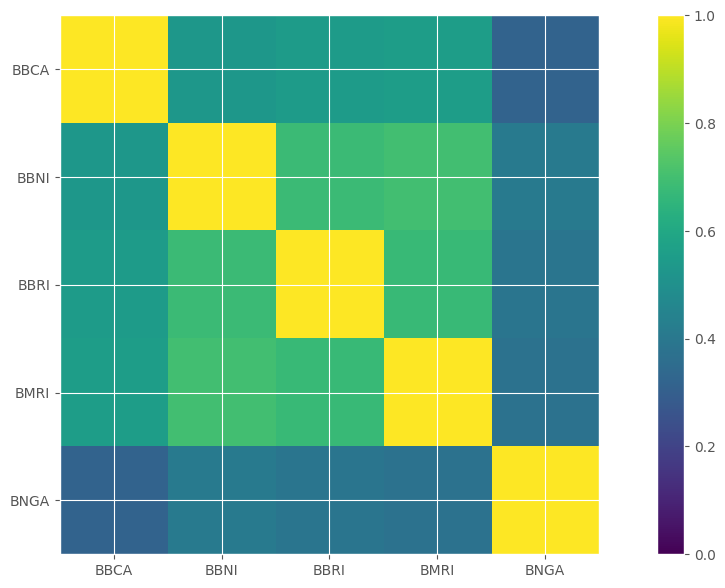

In [26]:
# Cek Korelasi antar Saham:
plt.imshow(correlation, cmap= None, interpolation = 'none',vmin=0,vmax=1);
plt.colorbar();
plt.xticks(range(len(correlation)),correlation.columns);
plt.yticks(range(len(correlation)),correlation.columns);

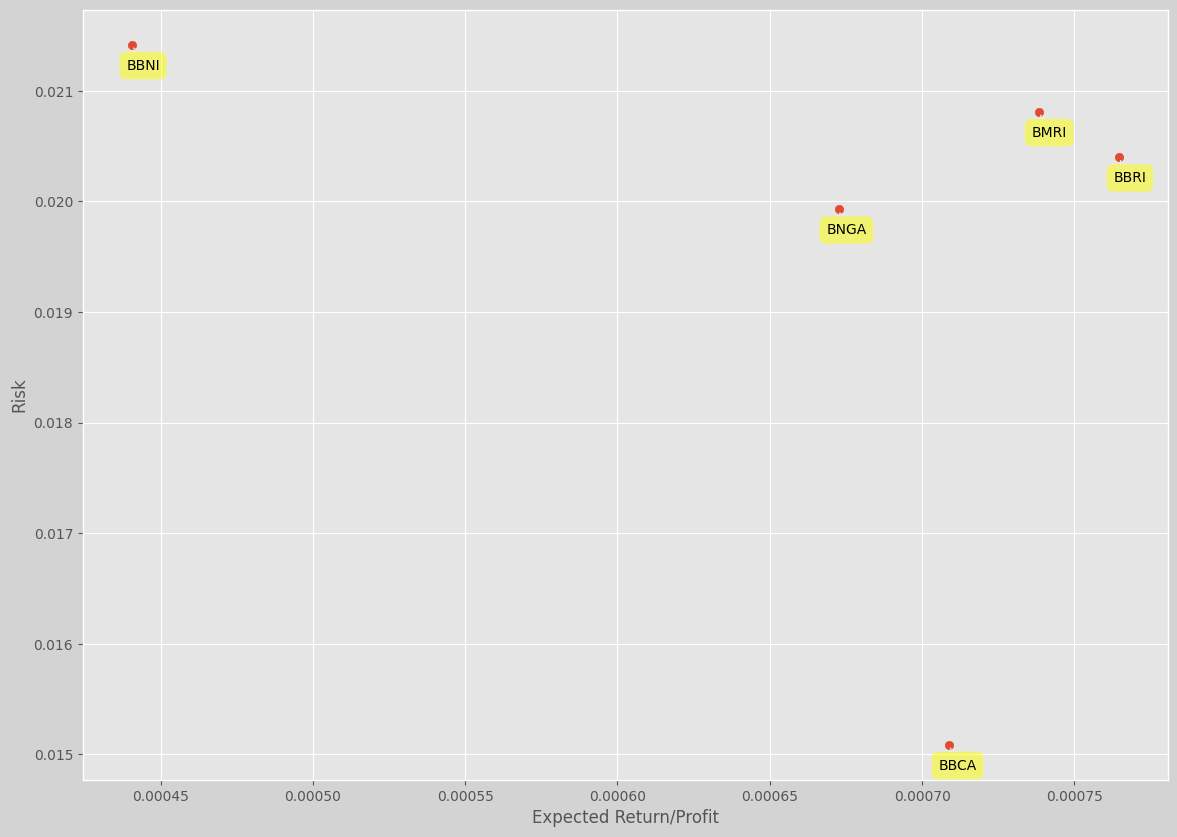

In [27]:
import matplotlib.pyplot as plt

# Assuming you have already defined retscompare and other necessary variables

# Create a figure with a light gray background
fig = plt.figure(figsize=(14, 10), facecolor='lightgray')

# Scatter plot
plt.scatter(retscompare.mean(), retscompare.std())
plt.xlabel('Expected Return/Profit')
plt.ylabel('Risk')

# Annotate points
for label, x, y in zip(retscompare.columns, retscompare.mean(), retscompare.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext=(20, -20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )

# Show the plot
plt.show()


In [28]:
dfreg = df.loc[:,['Adj Close','Volume']]
# HL_PCT Untuk melakukan calculate Data Frame dimana harga High dan Low dari suatu saham:
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
# PCT_change Untuk melihat percentage change dari harga close dibandingkan harga open:
dfreg['PCT_change'] = (df['Close'] - df['Open'])/ df['Open'] * 100.0
print(dfreg.head())

dfreg1 = df.loc[:,['Adj Close','Volume']]
dfreg1['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg1['PCT_change'] = (df['Close'] - df['Open'])/ df['Open'] * 100.0

dfreg2 = df.loc[:,['Adj Close','Volume']]
dfreg2['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg2['PCT_change'] = (df['Close'] - df['Open'])/ df['Open'] * 100.0

              Adj Close    Volume    HL_PCT  PCT_change
Date                                                   
2018-01-01  3946.549072         0  0.000000    0.000000
2018-01-02  3946.549072  82303500  3.196347    0.000000
2018-01-03  3946.549072  68214000  2.853881   -0.114025
2018-01-04  4005.115723  76567000  1.462317    1.484018
2018-01-05  4009.621094  65268000  1.011236   -0.224215


In [30]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate

dfreg.fillna(value = -99999, inplace = True)
print(dfreg.shape)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'],1))

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X', X.shape);
print('Dimension of Y', y.shape);


(1534, 5)
Dimension of X (1518, 4)
Dimension of Y (1518,)


<ipython-input-30-122c06c97160>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dfreg.drop(['label'],1))


In [31]:
# Quadratic Model:
dfreg1.fillna(value = -99999, inplace = True)

forecast_out1 = int(math.ceil(0.01 * len(dfreg1)))

forecast_col1 = 'Adj Close'
dfreg1['label'] = dfreg1[forecast_col1].shift(-forecast_out1)
X1 = np.array(dfreg1.drop(['label'],1))

X1 = preprocessing.scale(X1)

X_lately1 = X1[-forecast_out1:]
X1 = X1[:-forecast_out1]

y1 = np.array(dfreg1['label'])
y1 = y1[:-forecast_out1]

# KNN Model:
dfreg2.fillna(value = -99999, inplace = True)

forecast_out2 = int(math.ceil(0.01 * len(dfreg2)))

forecast_col2 = 'Adj Close'
dfreg2['label'] = dfreg2[forecast_col2].shift(-forecast_out2)
X2 = np.array(dfreg2.drop(['label'],1))

X2 = preprocessing.scale(X2)

X_lately2 = X2[-forecast_out2:]
X2 = X2[:-forecast_out2]

y2 = np.array(dfreg2['label'])
y2 = y2[:-forecast_out2]

<ipython-input-31-1e0fc05f972e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X1 = np.array(dfreg1.drop(['label'],1))
<ipython-input-31-1e0fc05f972e>:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = np.array(dfreg2.drop(['label'],1))


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [34]:
clfreg = LinearRegression(n_jobs= -1)
clfreg.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [35]:
clfpoly2 = make_pipeline(PolynomialFeatures(2),Ridge())
clfpoly2.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [36]:
clfpoly3 = make_pipeline(PolynomialFeatures(3),Ridge())
clfpoly3.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [37]:
clfknn = KNeighborsRegressor(n_neighbors = 2)
clfknn.fit(X2_train,y2_train)

KNeighborsRegressor(n_neighbors=2)

In [38]:
confidencereg = clfreg.score(X_test,y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X1_test,y1_test)
confidenceknn = clfknn.score(X2_test,y2_test)

print("The Linear Regression confidence is ", confidencereg)
print("The Quadratic Regression 2 confidence is ", confidencepoly2)
print("The Quadratic Regression 3 confidence is ", confidencepoly3)

print("The KNN Regression confidence is ", confidenceknn)

The Linear Regression confidence is  0.9663405427072902
The Quadratic Regression 2 confidence is  0.967273721509236
The Quadratic Regression 3 confidence is  0.960202941773221
The KNN Regression confidence is  0.9360918848481153


In [39]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

forecast_set1 = clfpoly3.predict(X_lately)
dfreg1['Forecast'] = np.nan
print(forecast_set1, confidencepoly3, forecast_out1)

forecast_set2 = clfknn.predict(X_lately)
dfreg2['Forecast'] = np.nan
print(forecast_set2, confidenceknn, forecast_out2)

[ 9694.31278372  9745.87217189  9840.63628449  9781.97091113
  9897.88789545  9991.30040186  9937.30965097 10055.98486973
 10024.78319512  9942.45923682  9893.01791289  9853.77850409
  9916.64439792 10051.35114166  9936.21158142  9893.81318046] 0.9663405427072902 16
[ 9795.01735713  9764.8210419   9830.90113103  9756.35895782
 10111.01109689 10142.89633555  9864.70002473  9990.26389552
  9998.72951011  9964.17377382  9865.69383862  9703.81485
  9752.29806037  9927.88031184 10126.70044862  9855.17939607] 0.960202941773221 16
[9341.84375    9687.5        9650.         9453.09716797 9007.02490234
 9007.02490234 9800.         9812.5        9850.         9762.5
 9762.5        9962.5        9316.25       9825.         9478.33447266
 9762.5       ] 0.9360918848481153 16


In [40]:
last_date = dfreg.iloc[-1].name
last_unix = last_date

next_unix = last_unix + datetime.timedelta(days = 1)



In [41]:
for i in forecast_set:
  next_date = next_unix
  next_unix += datetime.timedelta(days = 1)
  dfreg1.loc[next_date, :-1] = np.array([np.nan for _ in range(len(dfreg1.columns)-1)]) / i;





<ipython-input-41-bd4915faf729>:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  dfreg1.loc[next_date, :-1] = np.array([np.nan for _ in range(len(dfreg1.columns)-1)]) / i;


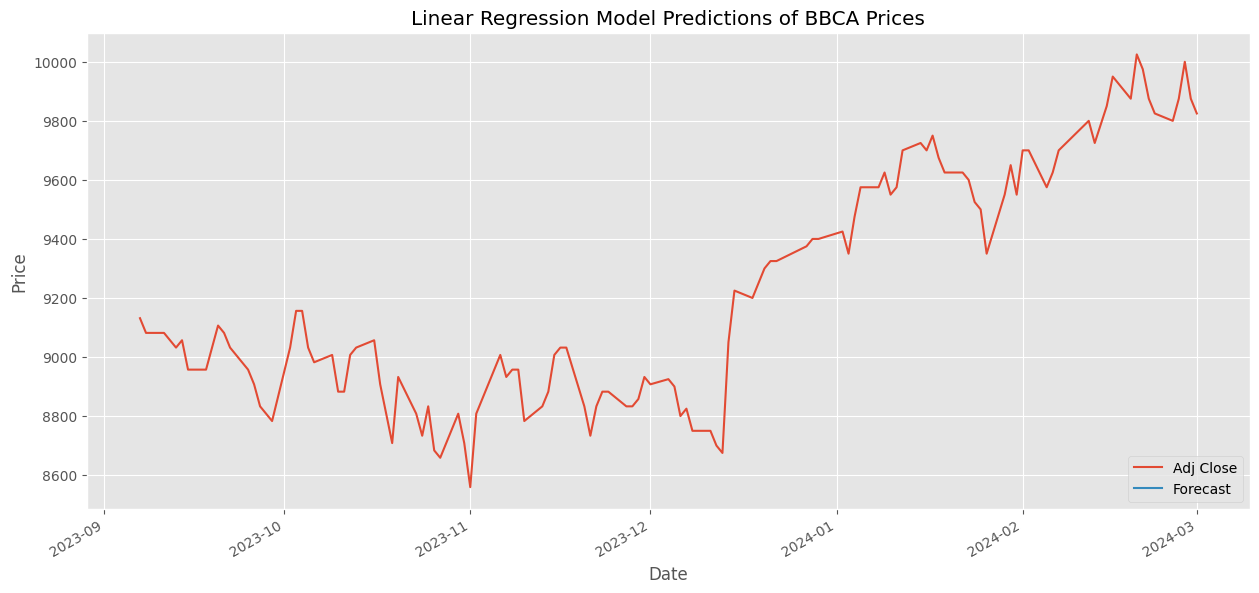

In [44]:
dfreg['Adj Close'].tail(120).plot()
dfreg['Forecast'].tail(120).plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model Predictions of BBCA Prices')
plt.show()

In [45]:
last_date = dfreg1.iloc[-1].name
last_unix = last_date

next_unix = last_unix + datetime.timedelta(days = 1)

for i in forecast_set1:
  next_date = next_unix
  next_unix += datetime.timedelta(days = 1)
  dfreg1.loc[next_date] = [np.nan] * (len(dfreg1.columns) - 1) + [np.nan]  # Adding a trailing NaN
  dfreg1.loc[next_date] /= i


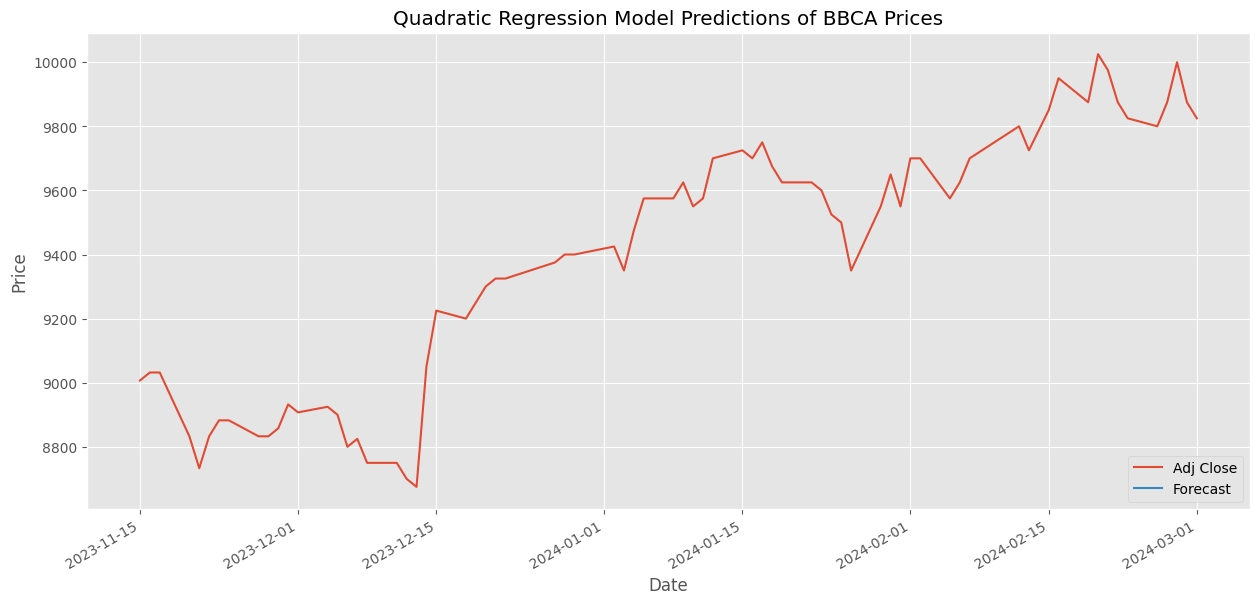

In [48]:
dfreg1['Adj Close'].tail(120).plot()
dfreg1['Forecast'].tail(120).plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Quadratic Regression Model Predictions of BBCA Prices')
plt.show()